<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [15]:
!pip install pandas==0.25

     |████████████████████████████████| 10.5MB 2.8MB/s 
     |████████████████████████████████| 235kB 53.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.5.3
    Uninstalling python-dateutil-2.5.3:
      Successfully uninstalled python-dateutil-2.5.3
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

##Confidence Interval

In [0]:
#import with column names and NaN values.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'y': 1, 'n': -1, '?': 0})

In [0]:
df.shape

(435, 17)

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
dems = df[df['party'] == 'democrat']
reps = df[df['party'] == 'republican']

In [0]:
dems.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
5,democrat,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1
6,democrat,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,1,1


In [0]:
reps.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
7,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,0,1
8,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1
10,republican,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1


In [0]:
def conf_inter(data, conf=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]

    mean = np.mean(data)
    n = len(data)

    stderr = np.std(data, ddof=1) / np.sqrt(n)
    margin_err = stderr * stats.t.ppf((1 + conf) / 2.0, n - 1)

    return mean, margin_err, (mean - margin_err, mean + margin_err)

In [0]:
conf_inter(dems['budget'])

(0.7565543071161048,
 0.07648582703439785,
 (0.680068480081707, 0.8330401341505027))

In [0]:
cols = list(df.columns[1:])
cols

['handicapped-infants',
 'water-project',
 'budget',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups',
 'anti-satellite-ban',
 'aid-to-contras',
 'mx-missile',
 'immigration',
 'synfuels',
 'education',
 'right-to-sue',
 'crime',
 'duty-free',
 'south-africa']

In [0]:
means = [conf_inter(df[i])[0] for i in cols]

In [0]:
means

[-0.11264367816091954,
 0.006896551724137931,
 0.18850574712643678,
 -0.16091954022988506,
 0.009195402298850575,
 0.27586206896551724,
 0.1310344827586207,
 0.1471264367816092,
 0.0022988505747126436,
 0.009195402298850575,
 -0.2620689655172414,
 -0.1425287356321839,
 0.01839080459770115,
 0.1793103448275862,
 -0.135632183908046,
 0.47586206896551725]

In [0]:
errors = [conf_inter(df[i])[1] for i in cols]

In [0]:
errors

[0.09242500709719055,
 0.08898468946640066,
 0.09143028055398933,
 0.09189828316190697,
 0.09269942572582386,
 0.08943393418559965,
 0.09198679129780005,
 0.09165842242181092,
 0.09192745421513823,
 0.09357818950870879,
 0.08865581271130886,
 0.0899206987418562,
 0.09157678829284585,
 0.09092211135637694,
 0.09035592011746293,
 0.06897308860472011]

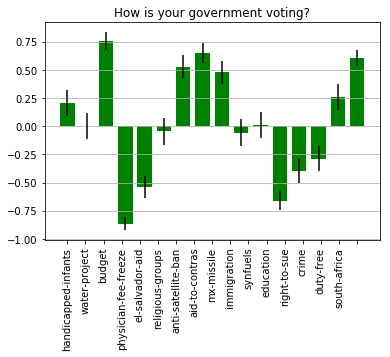

In [0]:
fig, ax = plt.subplots()

ax.bar(np.linspace(0, len(means), len(means)), means, yerr=errors, color='green')
ax.set_xticks(range(17))
ax.set_xticklabels(cols, rotation=90);
ax.yaxis.grid(True)
ax.set_title("How is your government voting?")
plt.show()

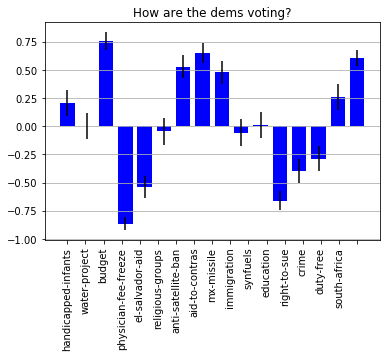

In [0]:
dem_means = [conf_inter(dems[i])[0] for i in cols]
dem_errors = [conf_inter(dems[i])[1] for i in cols]
fig, ax = plt.subplots()

ax.bar(np.linspace(0, len(dem_means), len(dem_means)), dem_means, yerr=dem_errors, color='blue')
ax.set_xticks(range(17))
ax.set_xticklabels(cols, rotation=90);
ax.yaxis.grid(True)
ax.set_title("How are the dems voting?")
plt.show()

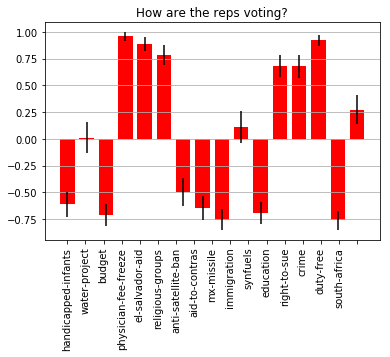

In [0]:
rep_means = [conf_inter(reps[i])[0] for i in cols]
rep_errors = [conf_inter(reps[i])[1] for i in cols]
fig, ax = plt.subplots()

ax.bar(np.linspace(0, len(rep_means), len(rep_means)), rep_means, yerr=rep_errors, color='red')
ax.set_xticks(range(17))
ax.set_xticklabels(cols, rotation=90);
ax.yaxis.grid(True)
ax.set_title("How are the reps voting?")
plt.show()

##Chi testing

In [2]:
heads = ['age', 'op_year', 'nodes', 'survived_5yrs']
can = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=heads)
can.head()

,age,op_year,nodes,survived_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
can['survived_5yrs'] = [x if x is 1 else 0 for x in can['survived_5yrs']]

In [18]:
cont_table = pd.crosstab(can['survived_5yrs'], pd.cut(can['nodes'], bins=[0, 10, 20, 35, 55]), margins=True)
cont_table

nodes,"(0, 10]","(10, 20]","(20, 35]","(35, 55]",All
survived_5yrs,,,,,
0,39,15,7,1,62
1,91,11,5,1,108
All,130,26,12,2,170


In [26]:
bins=['0-10', '11-20', '21-35', '36-52']
died = cont_table.iloc[0][0:6]
survived = cont_table.iloc[1][0:6]
died, survived

(nodes
 (0, 10]     39
 (10, 20]    15
 (20, 35]     7
 (35, 55]     1
 All         62
 Name: 0, dtype: int64, nodes
 (0, 10]      91
 (10, 20]     11
 (20, 35]      5
 (35, 55]      1
 All         108
 Name: 1, dtype: int64)

In [32]:
row_sums = cont_table.iloc[0:2, 4].values
col_sums = cont_table.iloc[2, 0:4].values
row_sums, col_sums

(array([ 62, 108]), array([130,  26,  12,   2]))

In [35]:
total = cont_table.iloc[2,4]
total

170

In [36]:
exp = []
for i in range(len(row_sums)):
    exp_row = []
    for col in col_sums:
        exp_val = col * row_sums[i]/total
        exp_row.append(exp_val)
    exp.append(exp_row)

exp = np.array(exp)
exp.shape, exp

((2, 4), array([[47.41176471,  9.48235294,  4.37647059,  0.72941176],
        [82.58823529, 16.51764706,  7.62352941,  1.27058824]]))

In [44]:
chi_squared = ((pd.crosstab(can['survived_5yrs'], pd.cut(can['nodes'], bins=[0, 10, 20, 35, 55])).values - exp)**2/(exp)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 10.03651242226511


In [45]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")    

Degrees of Freedom: 3


In [48]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(can['survived_5yrs'], pd.cut(can['nodes'], bins=[0, 10, 20, 35, 55])))
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 10.03651242226511
P-value: 0.01825830269331864
Degrees of Freedom: 3
Expected: 
 [[47.41176471  9.48235294  4.37647059  0.72941176]
 [82.58823529 16.51764706  7.62352941  1.27058824]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)